# README

Implementation of the Grassberger-Procaccia algorithm to estimate the correlation dimension of a set. Please refer to: http://www.scholarpedia.org/article/Grassberger-Procaccia_algorithm for more information on the Grassberger-Procaccia algorithm and the correlation dmension

Correlation dimension is a fractal dimension (such as Box-counting dimension or Hausdorff dimension) and it is characteristic of the set of points. If an attractor in phase space is being studied, once the attractor is completely unfolded in m dimensions, correlation dimension becomes an invariant and further embeddings in more dimensions do not influence its value, thus remaining constant.

# Notebook implementation

Test of the `grassberg_procaccia` function that implements the G-P algorithm, to estimate the correlation dimension of a set of points in a m dimensional space. This code takes in input a timeseries of scalar values and the embedding dimension (m) + time delay (tau) necessary to perform a time-delay embedding in phase space to reconstruct the attractor. See: https://en.wikipedia.org/wiki/Takens%27s_theorem for more information regarding the phase space reconstruction.

Function `grassberg_procaccia` is the main reference for the implementation. Some notes:

- it assumes the user has only a timeseries of scalar values coming from a dynamical system
- It assumes the time delay is known

Additonaly, this function can be used:

- It will be used to find the ideal embedding dimension m in which to unfold the attractor 
- While this implementation was successfully tested with Lorentz and Henon attractors, with High dimensional attractors coming from a stochastic-deterministic hybrid dynamics (with additive or even multiplicative noise) the Correlation sum in log-log shows two different scaling regions. Thus results can not be trusted.


# Test example of the implementation of Grassberger-Procaccia algorithm

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import GP_algorithm as gp

plt.rcParams['figure.figsize'] = [5, 5]

## Generation of a timeseries from Lorenz attractor

The following code for the timeseries generation from the Lorenz dynamical system was directly copied from https://matplotlib.org/stable/gallery/mplot3d/lorenz_attractor.html. © Copyright 2002 - 2012 John Hunter, Darren Dale, Eric Firing, Michael Droettboom and the Matplotlib development team; 2012 - 2021 The Matplotlib development team.

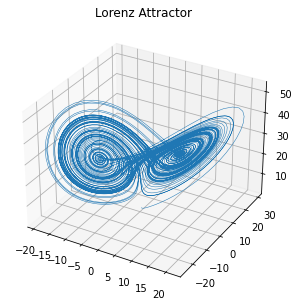

In [2]:
def lorenz(x, y, z, s=10, r=28, b=2.667):
    '''Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial derivatives at the point x, y, z'''
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

dt = 0.01
num_steps = 10000

# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Step through "time", calculating the partial derivatives at the current point and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

# Plot the attractor
ax = plt.figure().add_subplot(projection='3d')
ax.plot(xs, ys, zs, lw=0.5)
ax.set_title("Lorenz Attractor")
plt.show()

# X dimension timeseries

To test the GP algorithm we will use the previously generated timeseries coming from the X dimension to reconstruct back the phase space (in the assumption we have data of which we don't know the original deterministic model, and we have only a timeseries of scalars) and then estimate the Correlation dimension

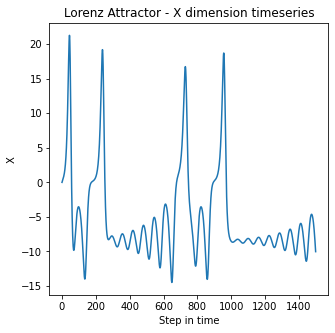

In [3]:
# plot only X dimension, the first 1500 steps

plt.plot(range(num_steps)[:1500], xs[:1500])
plt.title("Lorenz Attractor - X dimension timeseries")
plt.xlabel("Step in time")
plt.ylabel("X")
plt.show()

# Correlation Dimension of X timeseries

Following Takens theorem, the necessary embedding dimension for the reconstruction is 2*dim (2 times the original dimension from which ).
Correlation sum C(r) scales as r^{D}. Thus the correlation dimension can be reconstructed in a log log plot

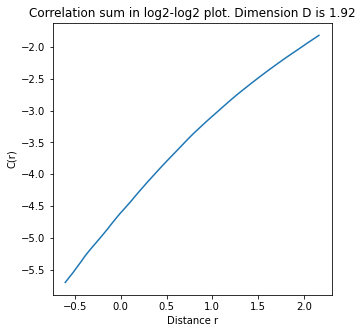

In [4]:
# Test the function for a single value
emb_dim = 3
# Arbitrary time delay
time_delay = 20
timeseries = xs[:1500]

# Algortuhm execution to get the dimension
D = gp.grassberg_procaccia(timeseries,emb_dim,time_delay,plot = True)

## Finding the best embedding dimension for the Lorenz attractor using the correlation dimension

We compute the correlation dimension for different candidate embedding dimensions for the timeseries X of scalar values coming from the original lorentz system. We find that D reaches a plateau at embedding_dim equal to 3, as the original one (Also note that the dimension given by Takens’s theorem is only an upper limit. A lower embedding dimension may suffice)

In [5]:
# Compute the correlation dimension for a set of different embedding dimensions of the timeseries
Ds = []

for emb_dim in range(1,8):
    
    time_delay = 20
    timeseries = xs[:1500]
    
    D = gp.grassberg_procaccia(timeseries,emb_dim,time_delay,plot = False)
    Ds.append(D)


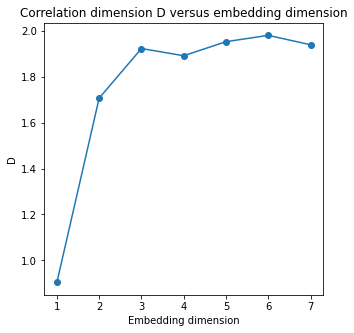

In [6]:
# Plot

plt.plot(range(1,8),Ds,'o-')
plt.xlabel("Embedding dimension")
plt.ylabel("D")
plt.title("Correlation dimension D versus embedding dimension")
plt.show()